In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('Cars.csv')


In [34]:
df.shape


(398, 9)

In [35]:
df.columns.values


array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'], dtype=object)

In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [37]:
df.set_index('name', inplace=True)


In [38]:
df['mpg'].unique()


array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [39]:
df['hp_to_weight'] = df['horsepower'] / df['weight']
df.reset_index(inplace=True)  # Reset index to avoid multi-index issue
df.set_index('hp_to_weight', inplace=True)


In [40]:
# 1. Name of car with highest horsepower
df.loc[df['horsepower'].idxmax(), 'name']


'pontiac grand prix'

In [41]:
# 2. Number of cars with mpg ≥ 35
(df['mpg'] >= 35).sum()


36

In [42]:
# 3. Most common origin for cars with horsepower > 100 and weight < 3000
filtered = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]
filtered['origin'].mode()[0]


'usa'

In [43]:
# 4. Mean acceleration of cars from Japan (rounded to 2 decimals)
round(df[df['origin'] == 'japan']['acceleration'].mean(), 2)


16.17

In [44]:
# 5. Year with highest average mpg
df.groupby('model_year')['mpg'].mean().idxmax()


80

In [45]:
# Car(s) with best hp/weight ratio and above-median mpg
median_mpg = df['mpg'].median()
above_median = df[df['mpg'] > median_mpg]
best_ratio_index = (above_median['horsepower'] / above_median['weight']).idxmax()
above_median.loc[best_ratio_index, ['name', 'mpg', 'horsepower', 'weight']]


name          bmw 2002
mpg               26.0
horsepower       113.0
weight            2234
Name: 0.050581915846016116, dtype: object

C:\Users\siddh\AppData\Local\Temp\ipykernel_12936\128018177.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df.reset_index(), x='model_year', y='mpg', hue='origin', estimator='mean', ci=None)
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


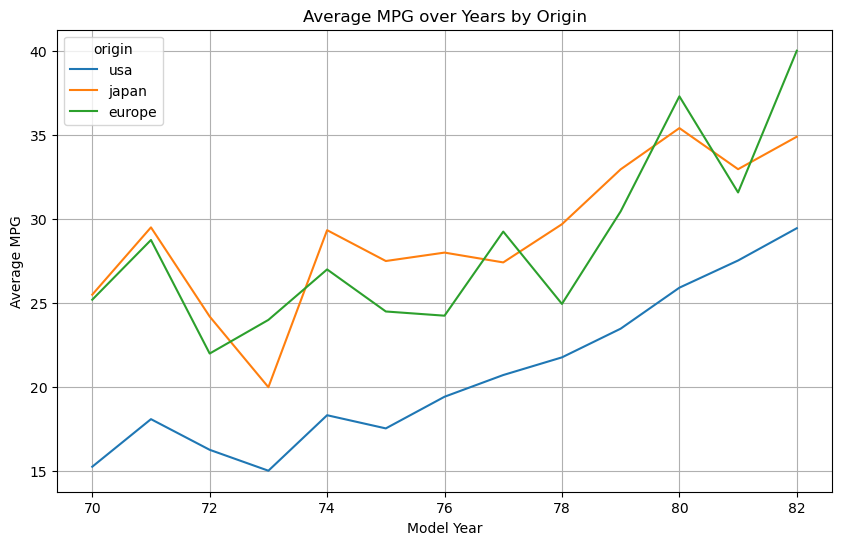

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.reset_index(), x='model_year', y='mpg', hue='origin', estimator='mean', ci=None)
plt.title('Average MPG over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()


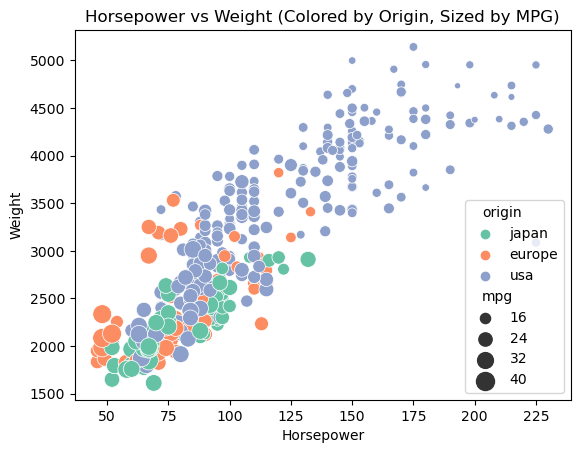

In [47]:
sns.scatterplot(
    data=df.reset_index(),
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa'],
    sizes=(20, 200),
    palette='Set2'
)
plt.title('Horsepower vs Weight (Colored by Origin, Sized by MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()


In [48]:
df_reset = df.reset_index()
grouped = df_reset.groupby('name')

multi_year = grouped.filter(lambda x: x['model_year'].nunique() > 1)

mpg_std = multi_year.groupby('name')['mpg'].std()
consistent = mpg_std[mpg_std < 1.0]

# Aggregate and sort
consistent_cars = multi_year[multi_year['name'].isin(consistent.index)]
summary = consistent_cars.groupby('name').agg(
    appearances=('model_year', 'nunique'),
    avg_mpg=('mpg', 'mean'),
    std_mpg=('mpg', 'std')
)

summary = summary[summary['std_mpg'] < 1.0]
summary_sorted = summary.sort_values(by=['appearances', 'avg_mpg'], ascending=False)
summary_sorted


,appearances,avg_mpg,std_mpg
name,,,
ford galaxie 500,3,14.333333,0.577350
plymouth fury iii,3,14.333333,0.577350
toyota corolla 1200,2,31.500000,0.707107
mazda 626,2,31.450000,0.212132
volkswagen rabbit,2,29.250000,0.353553
datsun pl510,2,27.000000,0.000000
saab 99le,2,24.500000,0.707107
toyota mark ii,2,19.500000,0.707107
dodge aspen,2,18.850000,0.353553
